In [6]:
import openslide

slide = openslide.OpenSlide("images//1%_cholesterol_+_0.25%_sodium_cholate//Kidney//66085.svs")
dimensions = slide.dimensions
print("Slide dimensions:", dimensions)

thumbnail = slide.get_thumbnail((1000, 1000))
thumbnail.show()


Slide dimensions: (75695, 24164)


In [2]:
import pandas as pd

# Load the TSV file to extract compound names
file_path_tsv = 'Open-tggates_AllAttribute.tsv'
 
#  Attempt to load the TSV file with a different encoding
data_tsv = pd.read_csv(file_path_tsv, sep='\t', encoding='ISO-8859-1')

# Extract unique compound names
unique_compounds = data_tsv['COMPOUND_NAME'].unique()

# Display the unique compound names
unique_compounds


/var/folders/td/yrbgv2bx6612pzs49201dk6r0000gn/T/ipykernel_11523/2977162805.py:7: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_tsv = pd.read_csv(file_path_tsv, sep='\t', encoding='ISO-8859-1')


array(['acetaminophen', 'isoniazid', 'carbon tetrachloride',
       'valproic acid', 'phenobarbital', 'rifampicin', 'phenylbutazone',
       'clofibrate', 'naphthyl isothiocyanate', 'allyl alcohol',
       'indomethacin', 'chlorpromazine', 'thioacetamide', 'omeprazole',
       'ethionine', 'aspirin', 'carbamazepine', 'diclofenac',
       'nitrofurantoin', 'benzbromarone', 'hexachlorobenzene', 'diazepam',
       'cyclophosphamide', 'methapyrilene', 'phenytoin', 'WY-14643',
       'gemfibrozil', 'bromobenzene', 'coumarin', 'allopurinol',
       'propylthiouracil', 'amiodarone', 'sulfasalazine', 'cimetidine',
       'perhexiline', 'azathioprine', 'ketoconazole', 'glibenclamide',
       'adapin', 'labetalol', 'methyltestosterone', 'haloperidol',
       'thioridazine', 'pemoline', 'chlormezanone', 'metformin',
       'fluphenazine', 'methimazole', 'monocrotaline', 'vitamin A',
       'griseofulvin', 'flutamide', 'tamoxifen', 'ethinylestradiol',
       'methyldopa', 'tetracycline', 'lomustin

In [5]:
from pubchempy import get_compounds
from tqdm import tqdm  # tqdm 모듈을 import
import pandas as pd

# Initialize a dictionary to store compound names and their SMILES
compound_smiles = {}

# Loop through each compound name and retrieve its SMILES string using PubChemPy
for compound in tqdm(unique_compounds, desc="Fetching SMILES"):
    try:
        # Get the compound from PubChem
        compounds = get_compounds(compound, 'name')
        if compounds:
            # Store the SMILES string
            compound_smiles[compound] = compounds[0].isomeric_smiles
        else:
            compound_smiles[compound] = None  # No SMILES found
    except Exception as e:
        compound_smiles[compound] = None  # Handle any exceptions

# Convert the dictionary to a DataFrame for easier handling
smiles_df = pd.DataFrame(list(compound_smiles.items()), columns=['Compound', 'SMILES'])

# Save the DataFrame to a CSV file
smiles_df.to_csv('compound_smiles.csv', index=False)

# Display the first few entries of the DataFrame
print(smiles_df.head())


Fetching SMILES: 100%|██████████| 170/170 [02:49<00:00,  1.00it/s]

               Compound                             SMILES
0         acetaminophen              CC(=O)NC1=CC=C(C=C1)O
1             isoniazid                 C1=CN=CC=C1C(=O)NN
2  carbon tetrachloride                    C(Cl)(Cl)(Cl)Cl
3         valproic acid                    CCCC(CCC)C(=O)O
4         phenobarbital  CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2


In [6]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# Example SMILES for the compound of interest (e.g., Chlorpromazine)
target_smiles = 'CN(C)CCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl'
target_mol = Chem.MolFromSmiles(target_smiles)
target_fp = FingerprintMols.FingerprintMol(target_mol)

# Assume smiles_df is a DataFrame with a column 'SMILES' containing the SMILES strings of other compounds
smiles_list = [ 'CC(C)CC1=CC=C(C=C1)C(C)C', 'CN(C)CCC2=CC=CC=C2', 'CN(C)CCOC(=O)C1=CC=CC=C1' ]
compounds = ['Compound A', 'Compound B', 'Compound C']

smiles_df = pd.DataFrame({'Compound': compounds, 'SMILES': smiles_list})

# Calculate similarity with the target compound
similarities = []
for smiles in smiles_df['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    fp = FingerprintMols.FingerprintMol(mol)
    similarity = DataStructs.FingerprintSimilarity(target_fp, fp)
    similarities.append(similarity)

smiles_df['Similarity'] = similarities

# Sort the compounds by similarity
smiles_df = smiles_df.sort_values(by='Similarity', ascending=False)

# Display the top potential analogs
print(smiles_df)


     Compound                    SMILES  Similarity
0  Compound A  CC(C)CC1=CC=C(C=C1)C(C)C    0.408000
1  Compound B        CN(C)CCC2=CC=CC=C2    0.350806
2  Compound C  CN(C)CCOC(=O)C1=CC=CC=C1    0.350120


               Compound                             SMILES  SMILES_length  \
0         acetaminophen              CC(=O)NC1=CC=C(C=C1)O             21   
1             isoniazid                 C1=CN=CC=C1C(=O)NN             18   
2  carbon tetrachloride                    C(Cl)(Cl)(Cl)Cl             15   
3         valproic acid                    CCCC(CCC)C(=O)O             15   
4         phenobarbital  CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2             33   

   Molecular_Weight  Num_H_Donors  Num_H_Acceptors  
0           151.165           2.0              2.0  
1           137.142           2.0              3.0  
2           153.823           0.0              0.0  
3           144.214           1.0              1.0  
4           232.239           2.0              3.0  


Matplotlib is building the font cache; this may take a moment.


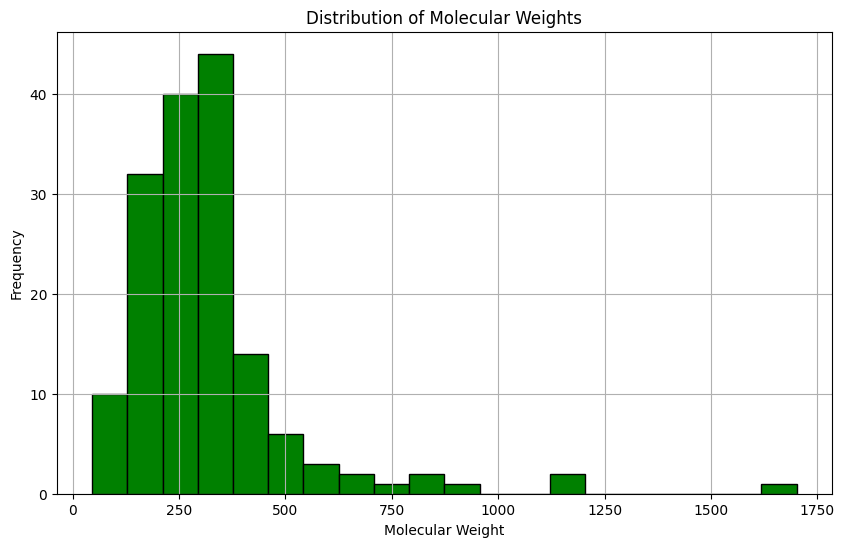

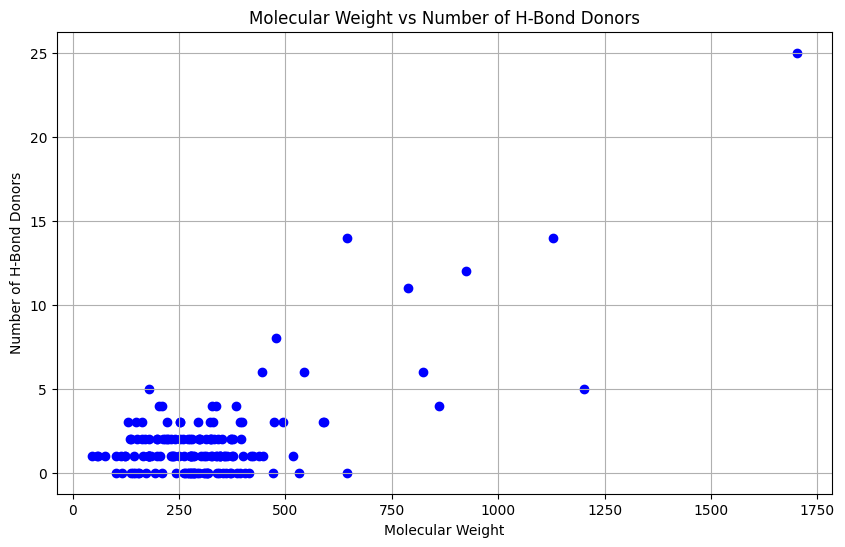

In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Function to calculate molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_weight = Descriptors.MolWt(mol)
        num_h_donors = Descriptors.NumHDonors(mol)
        num_h_acceptors = Descriptors.NumHAcceptors(mol)
        return pd.Series([mol_weight, num_h_donors, num_h_acceptors])
    else:
        return pd.Series([None, None, None])

# Load the SMILES data
smiles_df = pd.read_csv('compound_smiles.csv')  # 파일 경로를 실제 경로로 변경하세요

# Add a new column for the length of each SMILES string
smiles_df['SMILES_length'] = smiles_df['SMILES'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Apply the function to calculate descriptors for each SMILES
smiles_df[['Molecular_Weight', 'Num_H_Donors', 'Num_H_Acceptors']] = smiles_df['SMILES'].apply(
    lambda x: calculate_descriptors(x) if pd.notnull(x) else pd.Series([None, None, None]))

# Save the DataFrame with calculated descriptors
smiles_df.to_csv('smiles_with_descriptors.csv', index=False)

# Display the first few rows of the updated DataFrame
print(smiles_df.head())

# Plot the distribution of molecular weights
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(smiles_df['Molecular_Weight'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribution of Molecular Weights')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the relationship between molecular weight and number of hydrogen bond donors
plt.figure(figsize=(10, 6))
plt.scatter(smiles_df['Molecular_Weight'], smiles_df['Num_H_Donors'], color='blue')
plt.title('Molecular Weight vs Number of H-Bond Donors')
plt.xlabel('Molecular Weight')
plt.ylabel('Number of H-Bond Donors')
plt.grid(True)
plt.show()


[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerator
[17:54:38] DEPRECATION WARNING: please use MorganGenerat

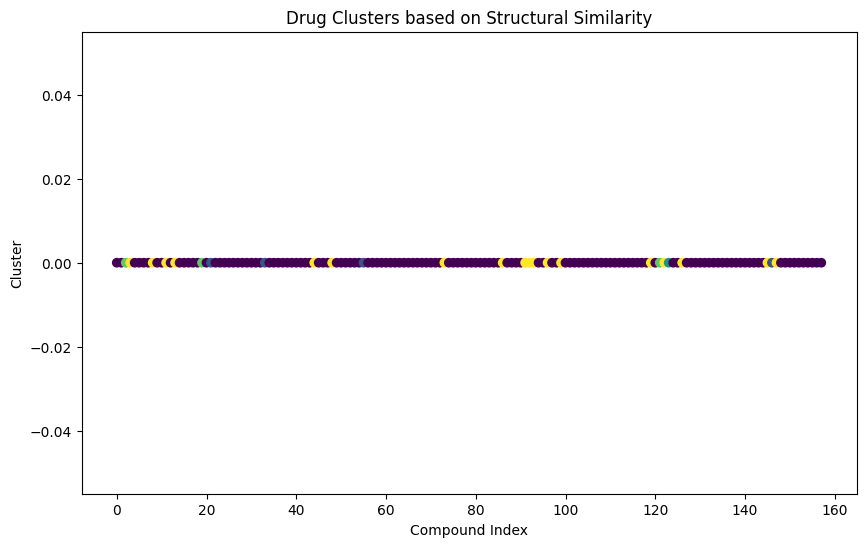

               Compound Cluster
0         acetaminophen       0
1             isoniazid       0
2  carbon tetrachloride       3
3         valproic acid       4
4         phenobarbital       0


In [14]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity
from rdkit import DataStructs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# 1. SMILES 데이터 로드
smiles_df = pd.read_csv('compound_smiles.csv')  # 파일 경로를 실제 경로로 변경하세요

# 2. 분자 지문 생성 함수
def get_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        return fp
    else:
        return None

# 3. 각 분자의 지문 계산
smiles_df['Fingerprint'] = smiles_df['SMILES'].apply(lambda x: get_fingerprint(x) if pd.notnull(x) else None)

# 4. 유사성 행렬 생성
fps = smiles_df['Fingerprint'].dropna().tolist()
n = len(fps)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# 5. 클러스터링 (계층적 클러스터링 사용)
distance_matrix = 1 - similarity_matrix  # 유사성을 거리로 변환
clustering = AgglomerativeClustering(n_clusters=5, linkage='average', metric='precomputed')
clusters = clustering.fit_predict(distance_matrix)

# 6. 결과를 데이터프레임에 저장
smiles_df['Cluster'] = None
smiles_df.loc[smiles_df['Fingerprint'].dropna().index, 'Cluster'] = clusters

# 7. 클러스터링 결과 시각화 (간단한 2D 시각화)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(clusters)), [0] * len(clusters), c=clusters, cmap='viridis')
plt.title('Drug Clusters based on Structural Similarity')
plt.xlabel('Compound Index')
plt.ylabel('Cluster')
plt.show()

# 클러스터 결과 출력
print(smiles_df[['Compound', 'Cluster']].head())


[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerator
[17:55:33] DEPRECATION WARNING: please use MorganGenerat

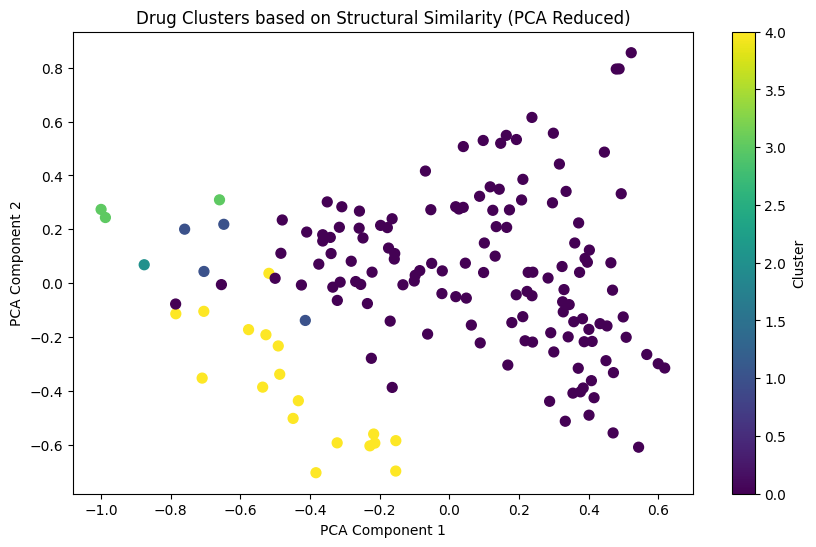

               Compound Cluster
0         acetaminophen       0
1             isoniazid       0
2  carbon tetrachloride       3
3         valproic acid       4
4         phenobarbital       0


In [15]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity
from rdkit import DataStructs
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. SMILES 데이터 로드
smiles_df = pd.read_csv('compound_smiles.csv')  # 파일 경로를 실제 경로로 변경하세요

# 2. 분자 지문 생성 함수
def get_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        return fp
    else:
        return None

# 3. 각 분자의 지문 계산
smiles_df['Fingerprint'] = smiles_df['SMILES'].apply(lambda x: get_fingerprint(x) if pd.notnull(x) else None)

# 4. 유사성 행렬 생성
fps = smiles_df['Fingerprint'].dropna().tolist()
n = len(fps)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# 5. 클러스터링 (계층적 클러스터링 사용)
distance_matrix = 1 - similarity_matrix  # 유사성을 거리로 변환
clustering = AgglomerativeClustering(n_clusters=5, linkage='average', metric='precomputed')
clusters = clustering.fit_predict(distance_matrix)

# 6. PCA를 사용한 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(similarity_matrix)

# 7. 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Drug Clusters based on Structural Similarity (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 클러스터 결과 출력
smiles_df['Cluster'] = None
smiles_df.loc[smiles_df['Fingerprint'].dropna().index, 'Cluster'] = clusters
print(smiles_df[['Compound', 'Cluster']].head())


[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerator
[18:10:33] DEPRECATION WARNING: please use MorganGenerat

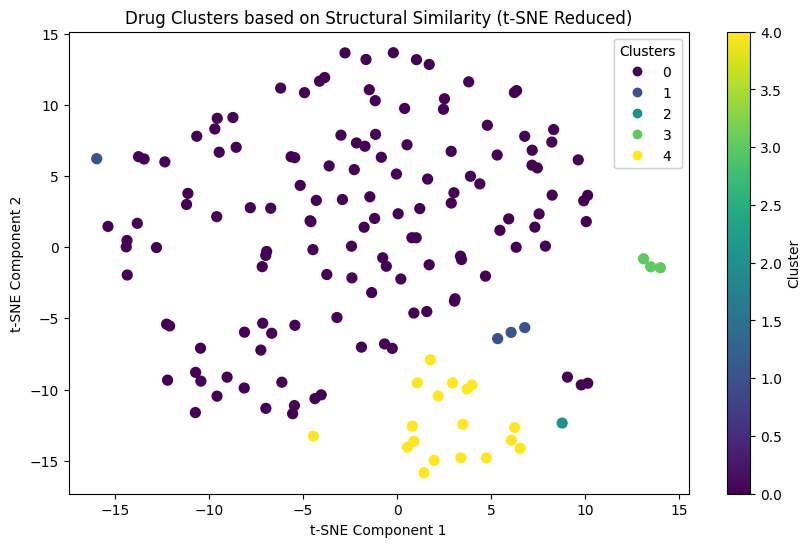

               Compound Cluster
0         acetaminophen       0
1             isoniazid       0
2  carbon tetrachloride       3
3         valproic acid       4
4         phenobarbital       0


In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors
from rdkit.DataStructs import TanimotoSimilarity
from rdkit import DataStructs
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 1. SMILES 데이터 로드
smiles_df = pd.read_csv('compound_smiles.csv')  # 파일 경로를 실제 경로로 변경하세요

# 2. 분자 지문 생성 함수 (MorganGenerator 사용)
def get_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        return fp
    else:
        return None

# 3. 각 분자의 지문 계산
smiles_df['Fingerprint'] = smiles_df['SMILES'].apply(lambda x: get_fingerprint(x) if pd.notnull(x) else None)

# 4. 유사성 행렬 생성
fps = smiles_df['Fingerprint'].dropna().tolist()
n = len(fps)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# 5. 클러스터링 (계층적 클러스터링 사용)
distance_matrix = 1 - similarity_matrix  # 유사성을 거리로 변환
clustering = AgglomerativeClustering(n_clusters=5, linkage='average', metric='precomputed')
clusters = clustering.fit_predict(distance_matrix)

# 6. t-SNE를 사용한 차원 축소 (init="random"으로 설정)
tsne = TSNE(n_components=2, metric="precomputed", random_state=42, init='random')
tsne_components = tsne.fit_transform(distance_matrix)

# 7. 클러스터링 결과 시각화 (t-SNE 사용)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=clusters, cmap='viridis', s=50)

# Add legend to the plot
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Optionally, label the clusters (using centroids or cluster representative points)
for i in range(max(clusters) + 1):
    # Compute the mean position of the points in each cluster
    x_text, y_text = tsne_components[clusters == i].mean(axis=0)

plt.title('Drug Clusters based on Structural Similarity (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 클러스터 결과 출력
smiles_df['Cluster'] = None
smiles_df.loc[smiles_df['Fingerprint'].dropna().index, 'Cluster'] = clusters
print(smiles_df[['Compound', 'Cluster']].head())


In [10]:
# Remove rows where the 'SMILES' column is NaN or empty
smiles_df_cleaned = smiles_df.dropna(subset=['SMILES'])
smiles_df_cleaned = smiles_df_cleaned[smiles_df_cleaned['SMILES'].str.strip() != ""]

# Recalculate the fingerprints for the cleaned data
smiles_df_cleaned['Fingerprint'] = smiles_df_cleaned['SMILES'].apply(lambda x: get_fingerprint(x) if pd.notnull(x) else None)

# Generate the similarity matrix for the cleaned data
fps = smiles_df_cleaned['Fingerprint'].tolist()
n = len(fps)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# Perform clustering on the cleaned data
distance_matrix = 1 - similarity_matrix
clustering = AgglomerativeClustering(n_clusters=5, linkage='average', metric='precomputed')
clusters = clustering.fit_predict(distance_matrix)

# Add the cluster labels to the cleaned DataFrame
smiles_df_cleaned['Cluster'] = clusters

# Save the cleaned and clustered data to a new CSV file
output_file_path = 'compound_smiles_with_clusters_cleaned.csv'
smiles_df_cleaned.to_csv(output_file_path, index=False)

output_file_path


[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerator
[18:14:09] DEPRECATION WARNING: please use MorganGenerat

'compound_smiles_with_clusters_cleaned.csv'


Exploring Cluster 0:
Number of Compounds: 132


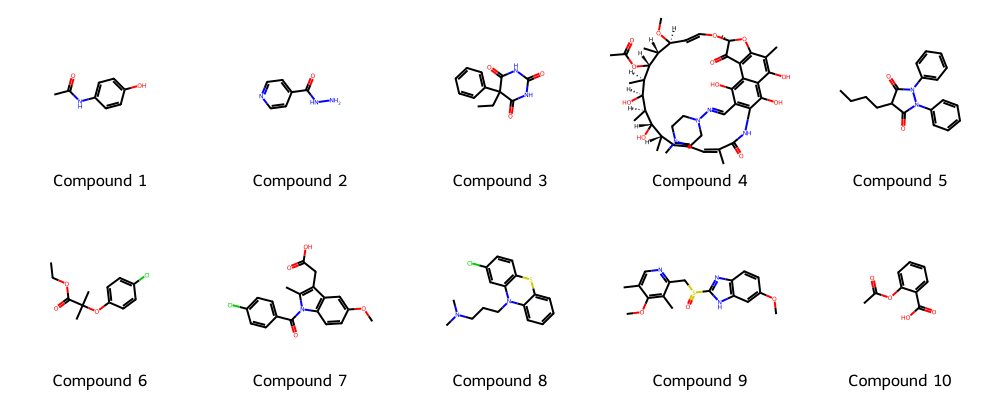


Exploring Cluster 1:
Number of Compounds: 4


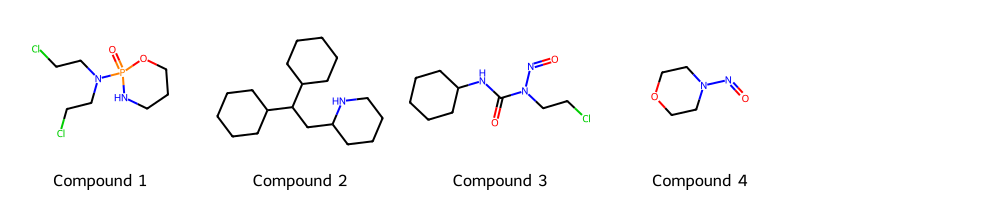


Exploring Cluster 2:
Number of Compounds: 1


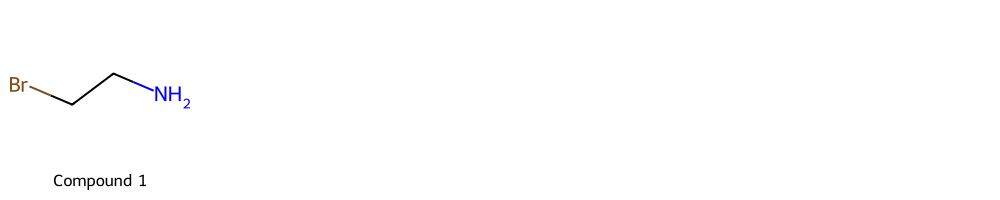


Exploring Cluster 3:
Number of Compounds: 3


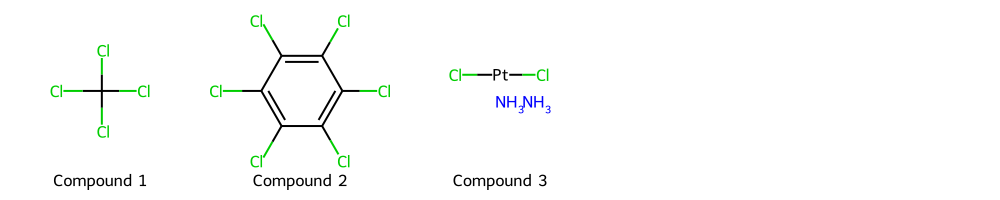


Exploring Cluster 4:
Number of Compounds: 18


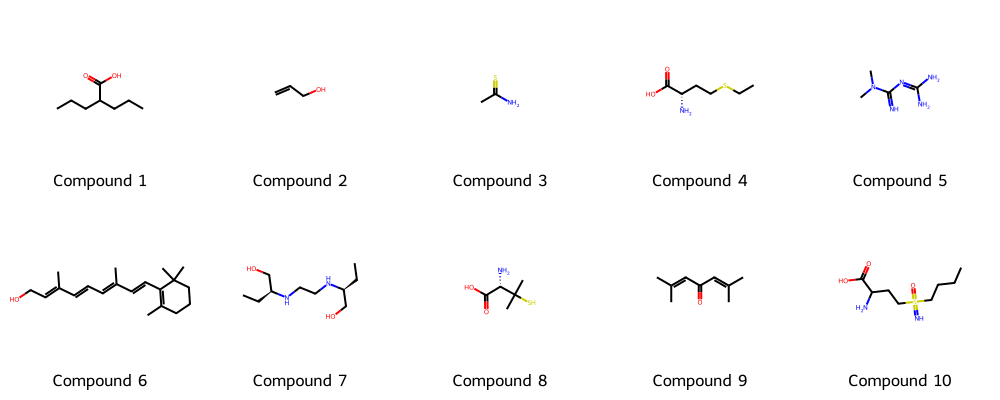

In [13]:
import pandas as pd
from rdkit.Chem import Draw
from rdkit import Chem
from IPython.display import display

# Load the SMILES data with cluster assignments
smiles_df = pd.read_csv('compound_smiles_with_clusters.csv')

# Function to visualize structures in a cluster
def visualize_cluster(cluster_num, df, max_mols=10):
    cluster_data = df[df['Cluster'] == cluster_num]
    mols = [Chem.MolFromSmiles(smiles) for smiles in cluster_data['SMILES'].head(max_mols)]
    img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200), legends=[f"Compound {i+1}" for i in range(len(mols))])
    return img

# Explore clusters
num_clusters = smiles_df['Cluster'].nunique()

for cluster_num in range(num_clusters):
    print(f"\nExploring Cluster {cluster_num}:")
    
    # Filter data for this cluster
    cluster_data = smiles_df[smiles_df['Cluster'] == cluster_num]
    
    # Print basic statistics about the cluster
    print(f"Number of Compounds: {len(cluster_data)}")
    
    # Display some statistics about the chemical properties
    properties = ['Molecular_Weight', 'LogP', 'Num_H_Donors', 'Num_H_Acceptors']  # Assuming these columns exist
    if all(prop in cluster_data.columns for prop in properties):
        print(cluster_data[properties].describe())
    
    # Visualize molecular structures in the cluster
    img = visualize_cluster(cluster_num, smiles_df)
    display(img)  # Use IPython display to show the image



Cluster 0:


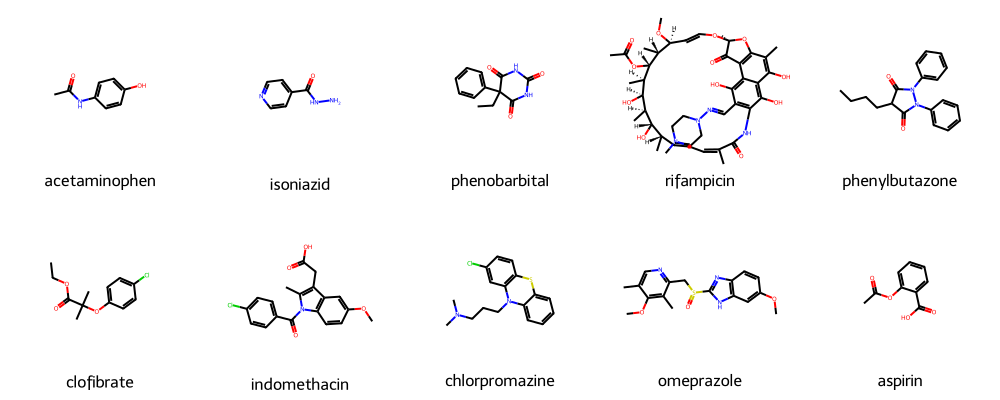

Cluster 1:


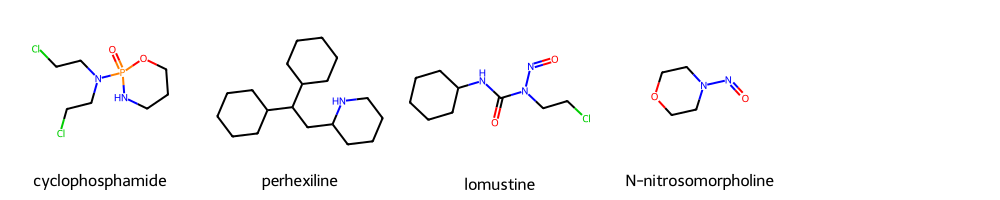

Cluster 2:


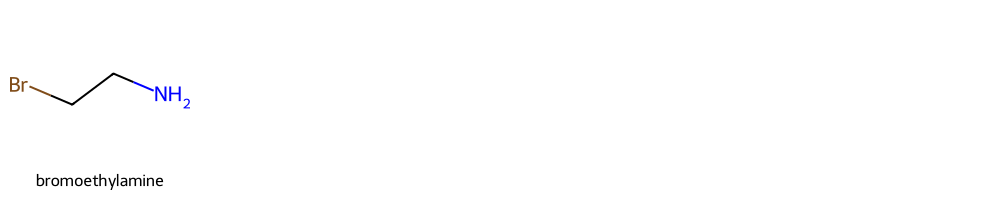

Cluster 3:


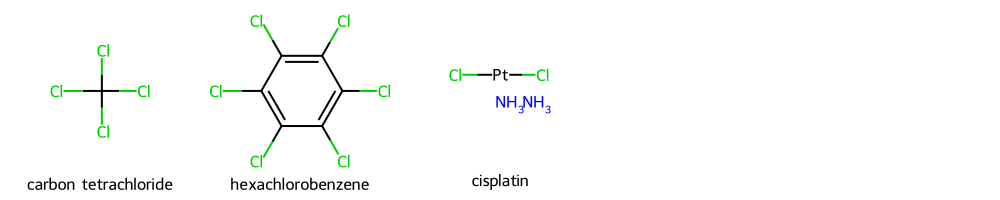

Cluster 4:


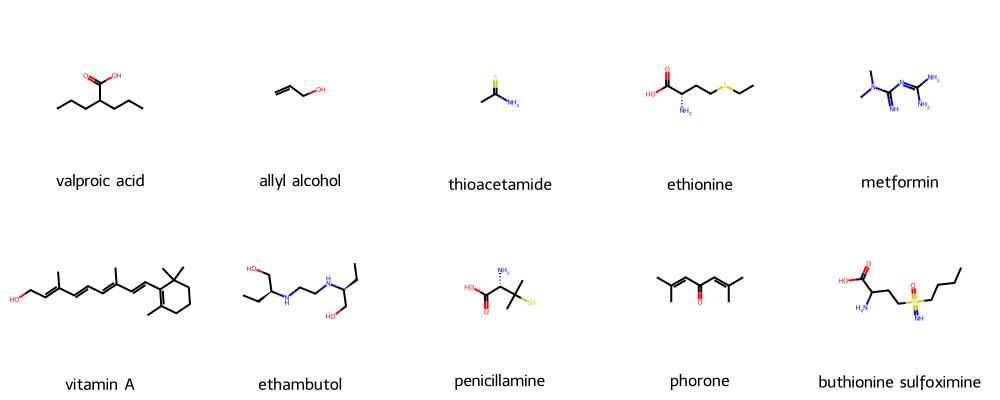

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Load the SMILES data with cluster assignments
smiles_df = pd.read_csv('compound_smiles_with_clusters.csv')

# Function to visualize structures in a cluster
def visualize_cluster(cluster_num, df, max_mols=10):
    cluster_data = df[df['Cluster'] == cluster_num]
    mols = [Chem.MolFromSmiles(smiles) for smiles in cluster_data['SMILES'].head(max_mols)]
    img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=[f"{row['Compound']}" for _, row in cluster_data.head(max_mols).iterrows()])
    return img

# Visualize structures for each cluster
num_clusters = smiles_df['Cluster'].nunique()

for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    img = visualize_cluster(cluster_num, smiles_df)
    display(img)  # Use IPython's display to show the image
